## Linear Prediction Model Project Implementation
To get started, we will import the necessary Python modules:

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
my_intercept = 0.25
my_slope = -1.5

Create a data set of INPUT values to support VISUALIZING behavior.

In [3]:
df_rand = pd.DataFrame({'x': np.linspace(-3.5, 3.5, num=101)})

In [4]:
df_rand.head()

,x
0,-3.50
1,-3.43
2,-3.36
3,-3.29
4,-3.22


Calculate the trend or the average output **given** the input.

In [5]:
# Assign the output to a column trend
df_rand['trend'] = my_intercept + my_slope * df_rand.x

In [6]:
df_rand

,x,trend
0,-3.50,5.500
1,-3.43,5.395
2,-3.36,5.290
3,-3.29,5.185
4,-3.22,5.080
...,...,...
96,3.22,-4.580
97,3.29,-4.685
98,3.36,-4.790
99,3.43,-4.895


Now let's visualize the TREND with respect to the INPUT as a LINE CHART. For this project I will make more figures in matplotlib rather than Seaborn. Mainly because matplotlib will allow me the flexibility to express the prediction model answer effecttively. 

In [7]:
# Set the figure style
sns.set_style('whitegrid')

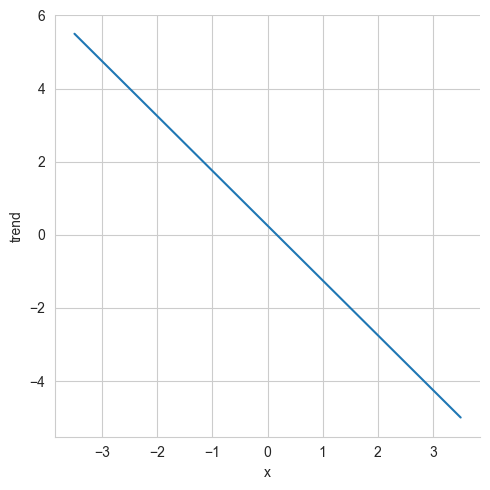

In [8]:
# Visualize the linear relationship 
sns.relplot(data = df_rand, x='x', y='trend', kind='line')

plt.show()

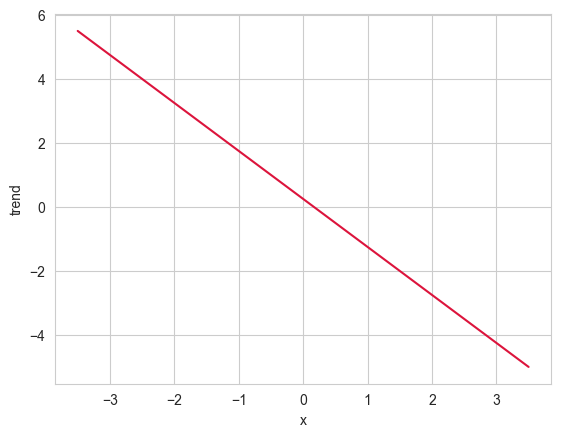

In [9]:
fig, ax = plt.subplots()

ax.plot( df_rand.x, df_rand.trend, color='crimson', linewidth=1.5 )

ax.set_xlabel('x')
ax.set_ylabel('trend')

plt.show()

We will now visualize the variation around the trend. Or, the uncertainty of a single output measurement around the average output! There is the likelihood of an output around the trend is a Gaussian distribution. The variation of a Gaussian is specified by the STANDARD DEVIATION or SIGMA. As such we need to specify the SIGMA to control the level of variation around the trend. 

Note! In real-world data, I would compute the sigma.

In [10]:
# Set the sigma
my_sigma = 1.25

Next, I will summarize that level of variation using **RIBBONS**. RIBBONS are defined by LOWER and UPPER BOUNDS that correspond to LOWER and UPPER BOUNDS of INTERVALS. Because the linear model has a GAUSSIAN likelihood or distribution, the UNCERTAINTY can be easily summarized as the number of standard deviations around the mean!!!!

We will use the $\pm1 \sigma$ and the $\pm2 \sigma$ intervals around the mean. These correspond to the 68% and the 95% uncertainty intervals.

In [11]:
# Calculate 68% uncertainty  bounds and assign to objects
df_rand['obs_lwr_68'] = df_rand.trend - my_sigma
df_rand['obs_upr_68'] = df_rand.trend + my_sigma

In [12]:
# Calculate 95% uncertainty bounds and assign to objects
df_rand['obs_lwr_95'] = df_rand.trend - 2 * my_sigma
df_rand['obs_upr_95'] = df_rand.trend + 2 * my_sigma

In [13]:
df_rand

,x,trend,obs_lwr_68,obs_upr_68,obs_lwr_95,obs_upr_95
0,-3.50,5.500,4.250,6.750,3.000,8.000
1,-3.43,5.395,4.145,6.645,2.895,7.895
2,-3.36,5.290,4.040,6.540,2.790,7.790
3,-3.29,5.185,3.935,6.435,2.685,7.685
4,-3.22,5.080,3.830,6.330,2.580,7.580
...,...,...,...,...,...,...
96,3.22,-4.580,-5.830,-3.330,-7.080,-2.080
97,3.29,-4.685,-5.935,-3.435,-7.185,-2.185
98,3.36,-4.790,-6.040,-3.540,-7.290,-2.290
99,3.43,-4.895,-6.145,-3.645,-7.395,-2.395


Visualize the UNCERTAINTY or LEVEL of VARIATION using RIBBONS.

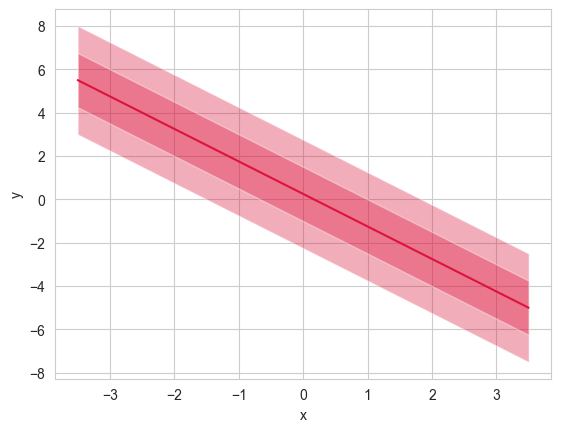

In [14]:
# Visualize the 68% and the 95% uncertainty intervals.
fig, ax = plt.subplots()

# TRUE TREND
ax.plot( df_rand.x, df_rand.trend, color='crimson', linewidth=1.5 )

# TRUE variation around the TREND - showing 2 intervals
# 2 sigma interval
ax.fill_between( df_rand.x, df_rand.obs_lwr_95, df_rand.obs_upr_95, facecolor='crimson', alpha=0.35 )

# 1 sigma interval
ax.fill_between( df_rand.x, df_rand.obs_lwr_68, df_rand.obs_upr_68, facecolor='crimson', alpha=0.35)

# set labels
ax.set_xlabel('x')
ax.set_ylabel('y')

# show the plot
plt.show()

Here we can see the prediction intervals that summarize the level of variation using RIBBONS. These ribbons defined the lower and upper bounds of that correspond to LOWER and UPPER BOUNDS of bothe the 68% and 95% confidence intervals set above. Now let's generate output data for our linear model application.

## Generate random output data

Let's generate a small number of random output observations at specific input values. For simplicity, i'll treat the input as NOT random rather the input will have values UNIFORMLY spaced between a lower bound and upper bound. Specifically, let's use 9 input locations between -3 and 3.

In [15]:
df = pd.DataFrame({'x': np.linspace(-3, 3, num=9)})

In [16]:
df

,x
0,-3.00
1,-2.25
2,-1.50
3,-0.75
4,0.00
5,0.75
6,1.50
7,2.25
8,3.00


Next, we need to calculate the MEAN OUTPUT or TREND **GIVEN** the input values!

In [17]:
df['trend'] = my_intercept + my_slope * df.x

In [18]:
df

,x,trend
0,-3.00,4.750
1,-2.25,3.625
2,-1.50,2.500
3,-0.75,1.375
4,0.00,0.250
5,0.75,-0.875
6,1.50,-2.000
7,2.25,-3.125
8,3.00,-4.250


The OUTPUT are RANDOMLY distributed around the MEAN as a GAUSSIAN distribution.

In [19]:
rg = np.random.default_rng(2100)

In [20]:
df['y'] = rg.normal( loc = df.trend, scale = my_sigma, size=df.shape[0] )

In [21]:
df

,x,trend,y
0,-3.00,4.750,6.030315
1,-2.25,3.625,1.457911
2,-1.50,2.500,2.388383
3,-0.75,1.375,0.007815
4,0.00,0.250,0.651244
5,0.75,-0.875,-2.254007
6,1.50,-2.000,-2.969992
7,2.25,-3.125,-3.537097
8,3.00,-4.250,-6.063282


Visualize the randomly generated output around the TREND.

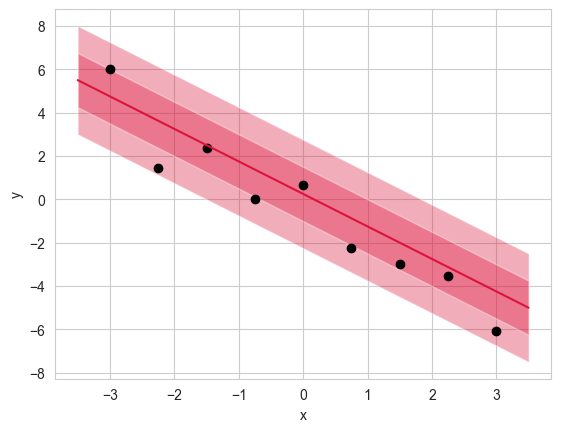

In [22]:
fig, ax = plt.subplots()

# TRUE TREND
ax.plot( df_rand.x, df_rand.trend, color='crimson', linewidth=1.5 )

# TRUE variation around the TREND - showing 2 intervals
# 2 sigma interval
ax.fill_between( df_rand.x, df_rand.obs_lwr_95, df_rand.obs_upr_95, facecolor='crimson', alpha=0.35 )

# 1 sigma interval
ax.fill_between( df_rand.x, df_rand.obs_lwr_68, df_rand.obs_upr_68, facecolor='crimson', alpha=0.35)

# include the randomly generated small data set as a scatter plot
ax.scatter( df.x, df.y, color='k' )

# set labels
ax.set_xlabel('x')
ax.set_ylabel('y')

# show the plot
plt.show()

With this small dataset, we can ultimately FIT models to it. But, for bookkeeping purposes let's store the TRUE coefficients and SIGMA that generated data.

In [23]:
df['true_intercept'] = my_intercept

In [24]:
df['true_slope'] = my_slope

In [25]:
df['true_sigma'] = my_sigma

In [26]:
df

,x,trend,y,true_intercept,true_slope,true_sigma
0,-3.00,4.750,6.030315,0.25,-1.5,1.25
1,-2.25,3.625,1.457911,0.25,-1.5,1.25
2,-1.50,2.500,2.388383,0.25,-1.5,1.25
3,-0.75,1.375,0.007815,0.25,-1.5,1.25
4,0.00,0.250,0.651244,0.25,-1.5,1.25
5,0.75,-0.875,-2.254007,0.25,-1.5,1.25
6,1.50,-2.000,-2.969992,0.25,-1.5,1.25
7,2.25,-3.125,-3.537097,0.25,-1.5,1.25
8,3.00,-4.250,-6.063282,0.25,-1.5,1.25


## Fit the linear model

In [27]:
# Fit the linear model between the single input x and the mean output y
lm_fit = smf.ols(formula='y ~ x', data=df).fit()

In [28]:
# Check the estimates parameters
lm_fit.params

Intercept   -0.476523
x           -1.696400
dtype: float64

In [29]:
# Check the std error (beta std error)
lm_fit.bse

Intercept    0.370031
x            0.191083
dtype: float64

In [30]:
# Check the pvalues
lm_fit.pvalues

Intercept    0.238754
x            0.000047
dtype: float64

In [31]:
# check the confidence interval and rename c. interval column names 
lm_fit.conf_int().rename(columns={0: 'ci_lower', 1: 'ci_upper'})

,ci_lower,ci_upper
Intercept,-1.351507,0.39846
x,-2.148239,-1.24456


### Making predictions
You will often make your data to study predictions using a number generator. This is usually your training data

### Create Training Dataset

In [32]:
# Generate training data and define the bounds then assign it to a af
df_viz = pd.DataFrame({'x': np.linspace(df.x.min()-0.1,  df.x.max()+0.1, num=101)})


In [33]:
# Preview the training data
df_viz

,x
0,-3.100
1,-3.038
2,-2.976
3,-2.914
4,-2.852
...,...
96,2.852
97,2.914
98,2.976
99,3.038


In [34]:
# Make the prediction and assign to it an object
# Note! you will almost always use the Fitted linear data model to make predictions
# And pass in the target df for predictions
# This will generate a pandas Series

lm_predict = lm_fit.predict(df_viz)

In [35]:
type(lm_predict)

pandas.core.series.Series

In [36]:
lm_predict

0      4.782316
1      4.677139
2      4.571962
3      4.466785
4      4.361608
         ...   
96    -5.314655
97    -5.419832
98    -5.525008
99    -5.630185
100   -5.735362
Length: 101, dtype: float64

In [37]:
# Check the number of prdiction data points or rows in the new dataset
lm_predict.size

101

In [38]:
# Make a copy of the viz df and aadd the prediction column to the copy
df_viz_copy = df_viz
df_viz_copy['pred_trend'] = lm_predict

In [39]:
# Now you have what is predicted from yor model
df_viz_copy

,x,pred_trend
0,-3.100,4.782316
1,-3.038,4.677139
2,-2.976,4.571962
3,-2.914,4.466785
4,-2.852,4.361608
...,...,...
96,2.852,-5.314655
97,2.914,-5.419832
98,2.976,-5.525008
99,3.038,-5.630185


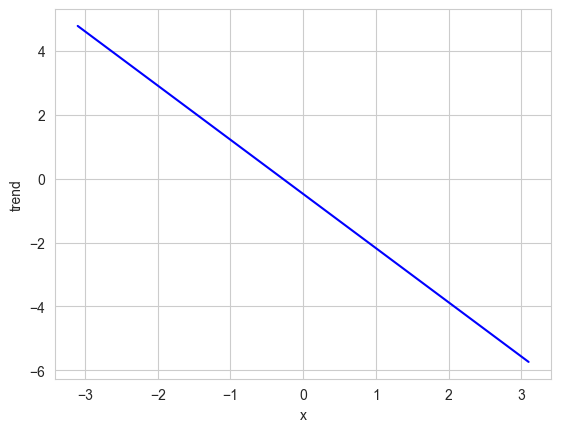

In [40]:
# Visualize what is being predicted (Predicted Trend) given the dataset input (x)
# You can do this with matplotlib

fig, ax = plt.subplots()
ax.plot(df_viz_copy.x, df_viz_copy.pred_trend, color='b')
ax.set_xlabel('x')
ax.set_ylabel('trend')
plt.show()

# Now you have your predicted trend

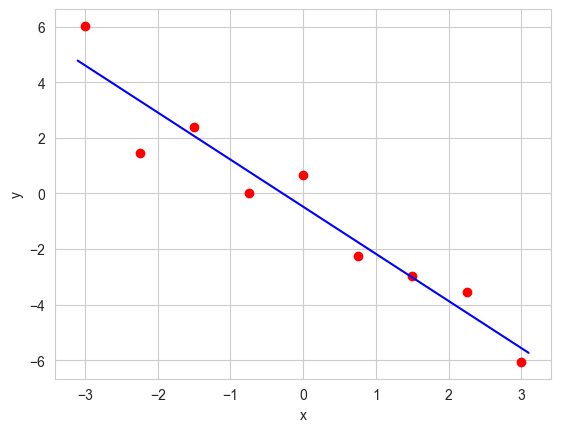

In [41]:
# Next include the training data set as a scatter plot to viz the relationship
fig, ax = plt.subplots()
ax.plot(df_viz_copy.x, df_viz_copy.pred_trend, color='b') # predicted trend data
ax.scatter(df.x, df.y, color='r') # training set (Observed data)
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

The predicted trend line runs through the scatter of observed data, attempting to find the best fit. Since we generated the observed data with a constant true trend and intercept, we already know their values. This allows us to compare the true trend and intercept with the estimates derived from the data.


In [42]:
my_intercept = np.unique(df.true_intercept)
my_slope = np.unique(df.true_slope)

In [43]:
my_intercept

array([0.25])

In [44]:
my_slope

array([-1.5])

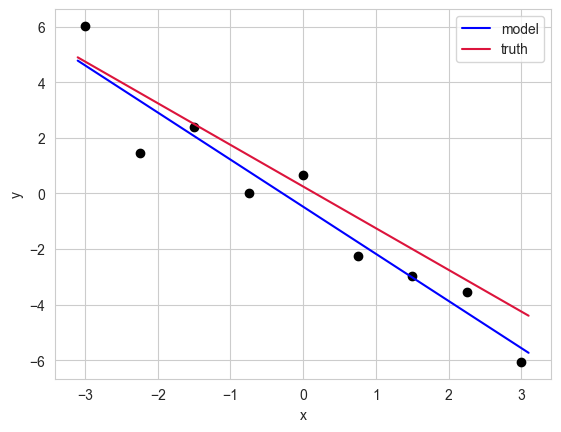

In [45]:
# Now visualize the relationship between the true_trend (true mean) and the input with the predicted trend (mean)
fig, ax = plt.subplots()

ax.plot(df_viz_copy.x, df_viz_copy.pred_trend, color='b', label='model') # predicted trend data MODEL (Blue line)

ax.plot(df_viz_copy.x, my_intercept + my_slope * df_viz_copy.x, color='crimson', label='truth') # the true model an input linear model (mu = B0 + B1 * x) relationship

ax.scatter(df.x, df.y, color='k') # training set (Observed data)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

plt.show()

Here, the red trend line represents the relationship between the trend (average output) and the input. Since this model is based on only nine samples, it is not perfect. Therefore, we must always account for and represent the uncertainty in the trend given the fitted data. Hence, To express the uncertainty or the confidence interval on the mean, we will use a two-step process with the `statsmodels` library to extract the predicted uncertainty for the predictions.

In [46]:
# Step 1: Call the .get_prediction() method on the fitted object lm_fit
# Assign to an object
predictions = lm_fit.get_prediction(df_viz)

In [47]:
type(predictions)

statsmodels.regression._prediction.PredictionResults

In [48]:
# Step 2: Apply the .summary_frame() method on the prediction object
# This will generate a data frame
lm_pred_summary_df = predictions.summary_frame()

In [49]:
lm_pred_summary_df

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,4.782316,0.698434,3.130782,6.433850,1.681036,7.883595
1,4.677139,0.688415,3.049296,6.304981,1.588411,7.765866
2,4.571962,0.678455,2.967672,6.176252,1.495582,7.648342
3,4.466785,0.668556,2.885902,6.047668,1.402546,7.531024
4,4.361608,0.658721,2.803980,5.919237,1.309302,7.413915
...,...,...,...,...,...,...
96,-5.314655,0.658721,-6.872283,-3.757026,-8.366961,-2.262349
97,-5.419832,0.668556,-7.000715,-3.838948,-8.484070,-2.355593
98,-5.525008,0.678455,-7.129298,-3.920718,-8.601388,-2.448628
99,-5.630185,0.688415,-7.258028,-4.002343,-8.718913,-2.541458


Here, we have rows representing prediction points and columns representing the trend (mean), the standard error of the mean, the lower and upper bounds of the 95% confidence interval for the trend (mean_ci_lower and mean_ci_upper), and the lower and upper bounds of the 95% confidence interval for the observations (obs_ci_lower and obs_ci_upper).

With this information, we can visualize the 95% confidence interval of the trend output using ribbons.

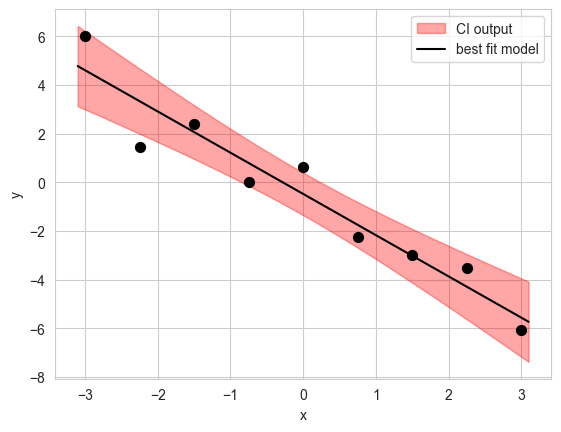

In [50]:
# Visualize the CI of the trend output

fig, ax = plt.subplots()

# confidence interval mean (trend) output
ax.fill_between(df_viz_copy.x, 
                lm_pred_summary_df.mean_ci_lower, lm_pred_summary_df.mean_ci_upper, 
                facecolor='red', edgecolor='red', alpha=0.35, label='CI output' )

# the best-fit line (this is the output mean of the predictive trend)
ax.plot(df_viz_copy.x, lm_pred_summary_df['mean'], 
        color='k', lw=1.5, label='best fit model') # the name mean using bracket notation because .mean is a reserve kw.

# Include the training data as a scatter plot 
ax.scatter(df.x, df.y, color='k', s=50)

# set labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

# show plot
plt.show()


Now let's visualize with the true trend for context. To see how the predictive trend varies

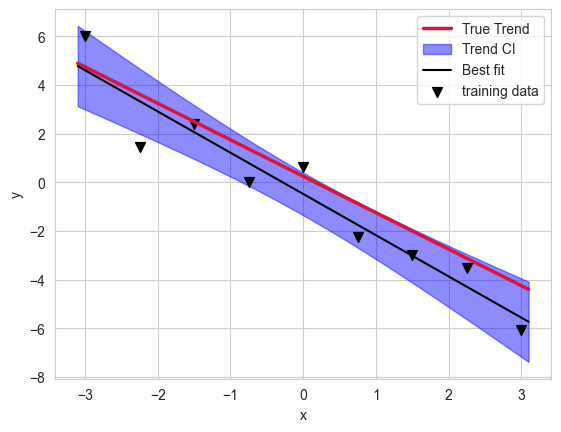

In [51]:
# Visualize the CI of the trend output

fig, ax = plt.subplots()

# Include the true trend
ax.plot(df_viz_copy.x, my_intercept + my_slope * df_viz_copy.x, 
        color='crimson', label='True Trend', linewidth=2.5) # This is the real relationship btw the mean output and the input

# Plot confidence interval mean (trend) output as ribbon
ax.fill_between(df_viz_copy.x, 
                lm_pred_summary_df.mean_ci_lower, lm_pred_summary_df.mean_ci_upper, 
                facecolor='blue', edgecolor='blue', alpha=0.45, label='Trend CI' )

# the best-fit line (this is the output mean of the predictive trend)
ax.plot(df_viz_copy.x, lm_pred_summary_df['mean'], # Using bracket notation for the mean because .mean is a reserve kw.
        color='k', lw=1.5, label='Best fit') 

# Add the training data as a scatter plot 
ax.scatter(df.x, df.y, color='k', marker='v', s=50, label='training data')


# set labels 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

# show plot
plt.show()


Based on this, we acknowledge the uncertainty of the average outcome. However, the real answer lies within the 95% confidence interval ribbon. This indicates that, given our current data, we correctly identify that the average output `𝑦` decreases as the input `𝑥` increases. The relationship between output and input aligns with the true trend. If we were to collect more data, the best-fit line would improve, and the confidence interval would narrow. Thus, this primarily expresses the uncertainty of the average, which is the mean output.

Also, if you examine the data, you will notice levels of variability that the model cannot account for. These are unexplained variations, so the confidence interval (CI) does not represent this unexplained variability. Therefore, we also consider the sigma parameters, which are the uncertainty or CI of the observation, commonly known as the prediction interval (PI). The PI indicates where we believe a single measurement might fall. It is through the PI that we understand how uncertain we are about an individual data point, and this uncertainty is greater than the uncertainty in the trend (average). Let's take a closer look at this.

In [52]:
lm_pred_summary_df.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,4.782316,0.698434,3.130782,6.433850,1.681036,7.883595
1,4.677139,0.688415,3.049296,6.304981,1.588411,7.765866
2,4.571962,0.678455,2.967672,6.176252,1.495582,7.648342
3,4.466785,0.668556,2.885902,6.047668,1.402546,7.531024
4,4.361608,0.658721,2.803980,5.919237,1.309302,7.413915


From the data above, we see that the mean confidence interval (mean_ci) ranges from 3 to 6.4, while the prediction interval (obs_ci) spans from 1 to 7.9. This means there is a 95% chance that a single measurement will fall within the prediction interval bounds. In contrast, the CI of the mean indicates that there is a 95% chance that the average of the data points lies within the mean_ci bounds. Let's visualize this by adding the prediction interval as a second ribbon in the prediction model. Note that the PI should be set first because it is a wider interval.

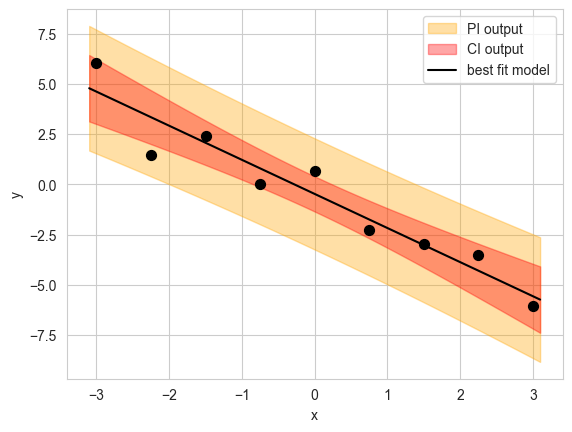

In [53]:
# Visualize the PI
fig, ax = plt.subplots()

# prediction interval - the uncertainty on a single observation (obs_ci)

ax.fill_between(df_viz_copy.x, 
                lm_pred_summary_df.obs_ci_lower, lm_pred_summary_df.obs_ci_upper, 
                facecolor='orange', edgecolor='orange', alpha=0.35, label='PI output' )

# confidence interval mean (trend) output
ax.fill_between(df_viz_copy.x, 
                lm_pred_summary_df.mean_ci_lower, lm_pred_summary_df.mean_ci_upper, 
                facecolor='red', edgecolor='red', alpha=0.35, label='CI output' )

# the best-fit line (this is the output mean of the predictive trend)
ax.plot(df_viz_copy.x, lm_pred_summary_df['mean'], 
        color='k', lw=1.5, label='best fit model') # the name mean using bracket notation because .mean is a reserve kw.

# Include the training data as a scatter plot 
ax.scatter(df.x, df.y, color='k', s=50)

# set labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

# show plot
plt.show()

## In Conclusion

You can see that the prediction interval (PI) remains a constant width, unlike the confidence interval (CI), which varies. The PI's width does not change because it represents the overall variability, attempting to approximate sigma. It indicates where individual data points can fall. For example, if we measure temperature data on one day, a hundred years in a row, and calculate the average of those one hundred measurements, the CI tells us where that average will likely be. Meanwhile, the PI tells us where a single measurement on any given day within those hundred years will fall with a 95% chance.

The PI specifies where individual measurements will lie, not just where the average will be. Note that all regression models have two kinds of uncertainty: uncertainty about the average output, expressed with a confidence interval, and uncertainty about individual data points, expressed with a prediction interval.

As a data scientist, it is essential to show both intervals for good linear predictions. This ensures our models can predict both the average outcome and individual data points, especially when dealing with real-world data. This approach enhances the trustworthiness of the model's predictions.

The main purpose of this mini-project is to demonstrate how to generate data, make predictions, study output trends, and express uncertainty for both the average output and individual measurements.